In [1]:
import sys
sys.path.append("..")

import dataset
import midi
import numpy as np
import util

In [2]:
array = np.array([1, 1, 2, 1, 1, 0, 0, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 2])
print(array)

[1 1 2 1 1 0 0 0 2 1 1 1 0 2 1 1 0 1 0 2]


In [3]:
settling_frame=5
decay_fn = midi.get_decay_fn("linear", settling_frame=settling_frame)

In [4]:
print(array)
print(decay_fn(array))

[1 1 2 1 1 0 0 0 2 1 1 1 0 2 1 1 0 1 0 2]
[4 3 4 3 2 0 0 0 4 3 2 1 0 4 3 2 0 4 0 4]


In [5]:
generator = dataset.new_generator(root="../../dataset/newbie-dataset/", slice_duration=5, note_scale=1.00, mark_onset=True, shuffle=False)

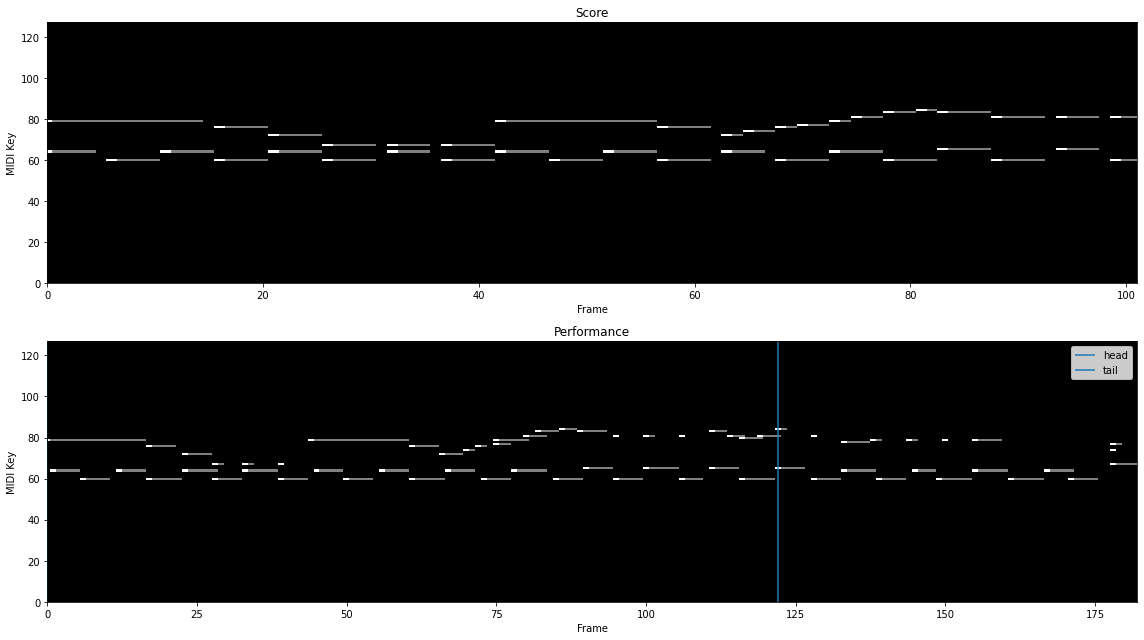

In [6]:
score_matrix, perf_matrix, (head, tail) = next(generator)
util.plot_midi_matrices(score_matrix, perf_matrix, (head, tail))

In [7]:
score_without_decay = midi.MIDIUnitSequenceList.from_midi_matrix(score_matrix)
print(score_without_decay)

[[Note(64, 2.00), Note(79, 2.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(79, 1.00)], [Note(60, 2.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(60, 1.00), Note(79, 1.00)], [Note(64, 2.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00), Note(79, 1.00)], [Note(64, 1.00)], [Note(60, 2.00), Note(76, 2.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(60, 1.00), Note(76, 1.00)], [Note(64, 2.00), Note(72, 2.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(64, 1.00), Note(72, 1.00)], [Note(60, 2.00), Note(67, 2.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1.00), Note(67, 1.00)], [Note(60, 1

In [8]:
score_with_decay = midi.MIDIUnitSequenceList.from_midi_matrix(score_matrix, decay_fn)
print(score_with_decay)

[[Note(64, 4.00), Note(79, 4.00)], [Note(64, 3.00), Note(79, 3.00)], [Note(64, 2.00), Note(79, 2.00)], [Note(64, 1.00), Note(79, 1.00)], [Rest], [Rest], [Note(60, 4.00)], [Note(60, 3.00)], [Note(60, 2.00)], [Note(60, 1.00)], [Rest], [Note(64, 4.00)], [Note(64, 3.00)], [Note(64, 2.00)], [Note(64, 1.00)], [Rest], [Note(60, 4.00), Note(76, 4.00)], [Note(60, 3.00), Note(76, 3.00)], [Note(60, 2.00), Note(76, 2.00)], [Note(60, 1.00), Note(76, 1.00)], [Rest], [Note(64, 4.00), Note(72, 4.00)], [Note(64, 3.00), Note(72, 3.00)], [Note(64, 2.00), Note(72, 2.00)], [Note(64, 1.00), Note(72, 1.00)], [Rest], [Note(60, 4.00), Note(67, 4.00)], [Note(60, 3.00), Note(67, 3.00)], [Note(60, 2.00), Note(67, 2.00)], [Note(60, 1.00), Note(67, 1.00)], [Rest], [Rest], [Note(64, 4.00), Note(67, 4.00)], [Note(64, 3.00), Note(67, 3.00)], [Note(64, 2.00), Note(67, 2.00)], [Note(64, 1.00), Note(67, 1.00)], [Rest], [Note(60, 4.00), Note(67, 4.00)], [Note(60, 3.00), Note(67, 3.00)], [Note(60, 2.00), Note(67, 2.00)], [

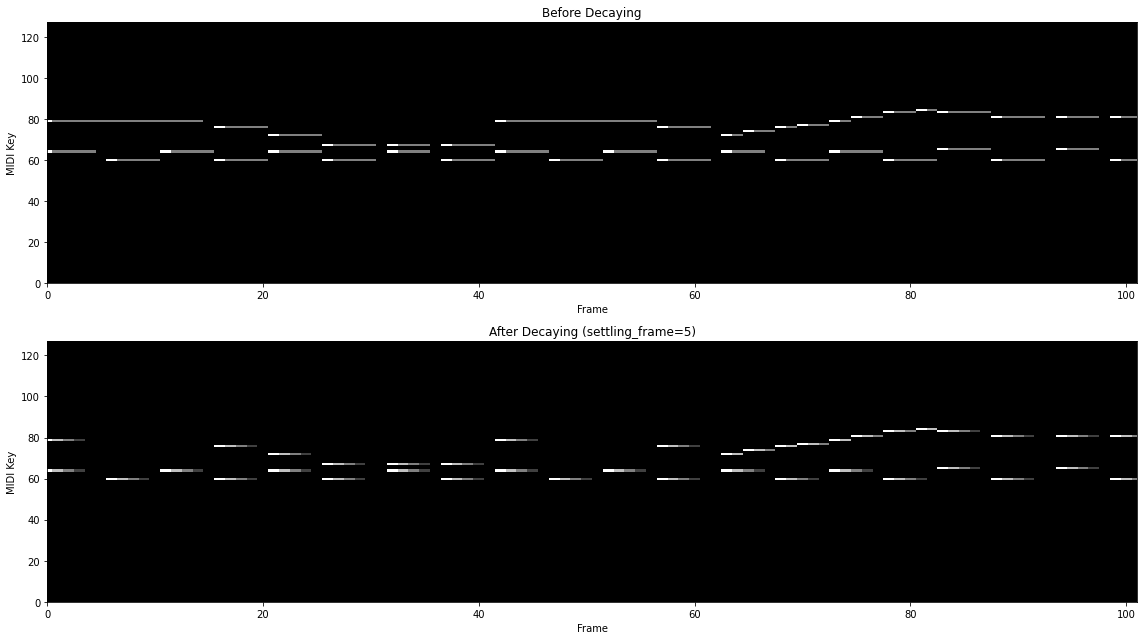

In [9]:
decayed_score_matrix = score_with_decay.to_midi_matrix(use_velocity=True)
util.plot_midi_matrices(score_matrix, decayed_score_matrix, title1="Before Decaying", title2=f"After Decaying ({settling_frame=})")